# Introduction

Implemeting data structures from Skienna


## Linked lists

In [1]:
class Node:
    def __init__(self, val=None):
        self.val = val
        self.next = None
        
        
class linkedList:
    def __init__(self):
        self.head = None
        
        
    def insertAtEnd(self,node):
        """ O(N) """
        
        #Grab last node
        temp = self.head
        while temp.next is not None:
            temp = temp.next
            
        #Attach
        temp.next = node
        
    def insertAtStart(self,node):
        temp = self.head
        node.next = temp
        self.head = node
        
        
    def search(self,val):
        temp = self.head
        if temp.val == val:
            return True
        while temp is not None:
            temp = temp.next
            if temp.val == val:
                return True
        return False
    
    
    def searchRecursive(self,val):        
        temp = self.head
        if temp is None:
            return False
        elif temp.val == val:
            return True
        else:
            return self.searchRecursive(self,val)
        
        
    def printNodes(self):
        temp = self.head
        while temp:
            print('val = {}'.format(temp.val))
            temp = temp.next
            
            
    def addListOfVals(self,vals):
        if self.head == None:
            self.head =  Node(val = vals[0])
            vals = vals[1:]
        temp = self.head
        for val in vals:
            newNode = Node(val=val)
            temp.next = newNode
            temp = temp.next
            
            
    def delete(self,val):
        
        #First find successor
        temp = self.head
        if temp.val == val:
            self.head = temp.next
            return 
            
        while temp:
            if temp.next.val == val:
                break
            temp = temp.next
        
        #Now temp is successor
        restOfList = temp.next.next
        temp.next = restOfList
        
        
            
vals = [i for i in range(1,6)]
L = linkedList()
L.addListOfVals(vals)
L.insertAtEnd(Node(6))
L.insertAtStart(Node(0))
L.printNodes()
L.delete(6)
L.printNodes()

val = 0
val = 1
val = 2
val = 3
val = 4
val = 5
val = 6
val = 0
val = 1
val = 2
val = 3
val = 4
val = 5


In [2]:
vals = [i for i in range(5)]
L = linkedList()
L.addListOfVals(vals)
L.printNodes()

val = 0
val = 1
val = 2
val = 3
val = 4


In [38]:
#Stand alone function        
def searchListRecursive(l,x):
    if l is None:
        return 'Not in list'
    elif l.val == x:
        return  l.val
    else:
        return searchListRecursive(l.next,x)    
    
searchListRecursive(L.head,3)

3

In [39]:
#Merge sort a singly linked list

def mergeLists(l1,l2):
    
    #Edge cases
    if not l1:
        return l2
    if not l2:
        return l1
    
    #Get head of sorted list
    if l1.val < l2.val:
        head_sorted = l1
        l1 = l1.next
    else:
        head_sorted = l2
        l2 = l2.next
        
    #Main while loop
    temp = head_sorted
    while l1 and l2:
        if l1.val < l2.val:
            temp.next = l1
            l1 = l1.next
            temp = temp.next
        else:
            temp.next = l2
            l2 = l2.next
            temp = temp.next
            
    #Catch bits at end
    temp.next = l1 or l2  #i.e attach the non empty one
    
    return head_sorted


def mergeSort(head):
    
    #Edge case
    if head is None or head.next is None:
        return head
    
    #Find midpoint
    slow,fast = head, head.next
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
        
    #Now split the second half
    head2 = slow.next
    slow.next = None
    
    #Now merge these two lists
    sortedL = mergeSort(head)
    sortedR = mergeSort(head2)
    return mergeLists(sortedL, sortedR)


#Make list
L1 = linkedList()
vals = [5,11,8,3,1,9]
L1.addListOfVals(vals)
head = L1.head


#Sort and look
out = mergeSort(head)
while out:
    print(out.val)
    out = out.next

1
3
5
8
9
11


### Containers

In [ ]:
class Stack:
    """ 
    Only one pointer to top. LIFO
    """
    
    def __init__(self):
        self.vals = []
    
    def pop(self,x):
        self.vals.append(x)
        
    def push(self):
        val = self.vals[-1]
        self.vals = self.vals[:-1]
        return val
    
    
class Queue:
    """
    Two pointers; one at top, one at end. FIFO.
    """
    def __init__(self):
        self.vals = []
        
    def enque(self,x):
        self.vals.prepend(x)
        
    def deque(self):
        return self.vals.pop(0)

### Dictionaries

In [1]:
class DictArray:
    """ Implement a dictionary with an unsorted array """
    
    def __init__(self):
        self.keys = []
        self.vals = []
        
    def search(self,key):
        """ O(N) """
        
        index = self.keys.index(key)
        return self.vals[index]    
        
    def insert(self,key,val):
        """ O(1)"""
        
        self.keys.append(key)
        self.vals.append(val)
    
    def delete(self,key):
        """ O(1) """
        
        #Find index of element to be deleted
        index = self.keys.index(key)
        self.keys.pop(index)
        self.vals.pop(index)
        
    def max1(self):
        """ O(N) """
        return max(self.keys)
    
    def min1(self):
        """ O(N) """
        return min(self.keys)
    
    
d = DictArray()
d.insert('kevin','29')
d.insert('tim','30')
d.search('tim')

'30'

In [2]:
import numpy as np


class DictHash:
    """ Haven't implemented collision 
        resolution yet
    """
    
    def __init__(self, size = 10**3):
        self.size = size
        self.keys = [np.inf for i in range(size)]
        self.values = [np.inf for i in range(size)]
        
    
    def insert(self,key,val):
        """ O(1) """
        
        #Find a hash        
        index = self.customHash(key)
        self.keys[index] = key
        self.values[index] = val
       
    
    def customHash(self,string):
        """ H(S) = \sum_{i}^}{|S|-(i+1)} char(s_i)"""
        
        S = hash(string)
        return S % self.size
    
    
    def search(self,key):
        """ O(n /m) -- where m length of chain """
        index = self.customHash(key)
        val = self.values[index]
        if val == np.inf:
            return 'Not in dict'
        else:
            return val
    
    
d = DictHash()
d.insert('kev', 28)
d.insert('dave', 30)
[d.search(i) for i in ['kev','dave','mike']]

[28, 30, 'Not in dict']

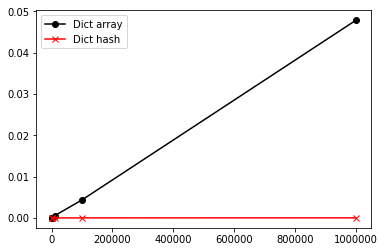

In [7]:
import time
import matplotlib.pyplot as plt
%matplotlib inline

def profile(numVals):

    keys,vals = list(range(numVals)), list(range(numVals))
    d1 = DictArray()
    d2 = DictHash(size=2*numVals)

    #Fill up dictionary
    for key,val in zip(keys,vals):
        d1.insert(key,val)
        d2.insert(key,val)

    #Time searches
    numTrials = 100
    key = np.random.choice(keys)
    times1 = []
    for trial in range(numTrials):
        key = np.random.choice(keys)
        t1 = time.time()
        d1.search(key)
        t2 = time.time()
        delta = (t2-t1)
        times1.append(delta)
    #print('mean time d1 {:.3f} mins'.format(np.mean(times1)))
    
    #Time searches
    numTrials = 100
    key = np.random.choice(keys)
    times2 = []
    for trial in range(numTrials):
        key = np.random.choice(keys)
        t1 = time.time()
        d2.search(key)
        t2 = time.time()
        delta = (t2-t1) 
        times2.append(delta)
    #print('mean time d2 {:.3f} mins'.format(np.mean(times2)))
    
    return np.mean(times1), np.mean(times2)

T1s, T2s = [], []
Ns = [10**2, 10**3, 10**4, 10**5, 10**6]
for N  in Ns:
    T1,T2 = profile(N)
    T1s.append(T1)
    T2s.append(T2)
plt.plot(Ns, T1s, 'ko-')
plt.plot(Ns, T2s, 'rx-')
plt.legend(['Dict array', 'Dict hash'])

O(N) for the array as expected

## Binary search tree

In [2]:
class Node:
    def __init__(self,val=None):
        self.val = val
        self.left = None
        self.right = None
        

def search(root,key):
    
    #Edge case
    if root is None:
        print('Not here')
        return False
    
    if root.val == key:
        return root

    #Binary search 
    if key < root.val:
        search(root.left, key)
    else:
        search(root.right, key)
        
        
def insert(root,node):
    if root is None:
        root = node
    else:
        if node.val <= root.val:
            if root.left is None:
                root.left = node
            else:
                insert(root.left,node)
        else:
            if root.right is None:
                root.right = node
            else:
                insert(root.right,node)
                
                
def minimum(root):
    while root.left is not None:
        root = root.left
    return root.val

def maximum(root):
    while root.right is not None:
        root = root.right
    return root.val
                
                
def printInOrder(root):
    if root is None:
        pass
    else:
        print(root.val)
        printInOrder(root.left)
        printInOrder(root.right)
                
#Test
root = Node(10)
vals = [2,3,20]
for val in vals:
    insert(root,Node(val))
#minimum(root), maximum(root)
search(root,13)

Not here


### Priority queue -- heap

In [6]:
from heapq import heappop, heappush

#add to heap
print('adding to heap')
heap = []
for val in [10,5,7,11,150,3]:
    heappush(heap,val)
    print('heap = {}'.format(heap))
    
#pop from heap
print('\n \nremoving from heap')
while heap:
    val = heappop(heap)
    print('val = {}'.format(val))
    print('heap = {} \n'.format(heap))

adding to heap
heap = [10]
heap = [5, 10]
heap = [5, 10, 7]
heap = [5, 10, 7, 11]
heap = [5, 10, 7, 11, 150]
heap = [3, 10, 5, 11, 150, 7]

 
removing from heap
val = 3
heap = [5, 10, 7, 11, 150] 

val = 5
heap = [7, 10, 150, 11] 

val = 7
heap = [10, 11, 150] 

val = 10
heap = [11, 150] 

val = 11
heap = [150] 

val = 150
heap = [] 



Can store tuples using heaps too, the ordering is by the first element

In [9]:
points = [(10,1),(3,5),(8,7),(9,3),(100,31)]
heap = []
for p in points:
    heappush(heap,p)
    print('heap = {}'.format(heap))

heap = [(10, 1)]
heap = [(3, 5), (10, 1)]
heap = [(3, 5), (10, 1), (8, 7)]
heap = [(3, 5), (9, 3), (8, 7), (10, 1)]
heap = [(3, 5), (9, 3), (8, 7), (10, 1), (100, 31)]


So the minimum x, where data are (x,y), are something 

Can also return n smallest elements

In [13]:
from heapq import nsmallest, nlargest

#add to heap
print('adding to heap')
heap = []
for val in [10,5,7,11,150,3]:
    heappush(heap,val)
    print('heap = {}'.format(heap))
    
nsmallest(3,heap), nlargest(3,heap)  #note, doesn't pop from heap; heap same as before

adding to heap
heap = [10]
heap = [5, 10]
heap = [5, 10, 7]
heap = [5, 10, 7, 11]
heap = [5, 10, 7, 11, 150]
heap = [3, 10, 5, 11, 150, 7]


([3, 5, 7], [150, 11, 10])

### Disjoint set data structure

https://www.youtube.com/watch?v=ID00PMy0-vE

In [ ]:
class DisjointSet:
    def __init__()

### Misc

In [3]:
class sortedArray:
    def __init__(self):
        self.vals = []
        
    def add(self,x):
        
        #Find insertion point
        ptr = 0
        while self.vals[ptr] <= x:
            ptr += 1
            
        #Now insert element
        curr_val = x
        while ptr <= len(self.vals) - 1:
            next_val = self.vals[ptr]
            self.vals[ptr] = curr_val
            curr_val = next_val
            ptr += 1
            
        #Terminating condition
        self.vals